# Predicting Credit Scores
### By: Ayuj Verma, Gauri Pala, Ayush Bhalavat, Arnav Chopra

# Introduction
For our project, we are analyzing the Credit Score dataset from Kaggle, found [here](https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data).

In this project, we aim to tackle the machine learning problem of credit score classfication. This problem is important for various financial instiutions, like banks, and other lending practices that tend to use credit scores. A credit score essentially represents an individual's creditworthiness, indicating the likelihood of them repaying borrowed money on time based on information from your credit reports. We are using features that relate to bank details and credit-related information for a customer to classify their credit score into a credit score bracket, either Good, Bad, or Standard.

This problem is relevant as it impacts various aspects of financial-decision making. Many financial institutions heavily rely on credit scores to assess the risk associated with lending money to different individuals. In general, a higher credit score typically suggests a lower risk of default (considered Good), whereas a low credit score illustrates a higher risk. Therefore, accurate classification of credit scores into bins of Good, Bad, or Standard is crucial for lenders to make informed decisions about loan approvals and interest rates. Places like banks need to know if someone is likley to pay them back before they give out loans or credit cards, so they can give out loans more safely and avoid losing money.

Our model that classifies a predicts if a person has a good, bad, or standard credit score can be utilized for several purposes. For loan approval, lenders can use the model to automate the process of loan approvals as they can use the prediction as an indicator of whether this person should receive a loan or not, which can streamline the operations and reduce manual workload. Similarly, other financial institutions can better assess the risk associated with lending to individuals, leading to more accurate loan prices and mitigating potential money losses. Furthermore, the model can assist in determining appropriate interest rates for loans based on the creditworthiness of applicants. Overall, with this machine learning model, the process of making decisions based on someone's credit related information can be automated. 

Predicting credit score does matter because knowing someone's credit score helps banks understand how risky it is to lend them money, and if they can predict it accurately, they can offer fair interest rates and help more peolpe access loans and credit cards.

Our dataset includes a vast amount of a person's basic bank details and credit-related information. The dataset is setup in a way where multiple records are attached to the same customer. Essentially, each customer has 8 records associated with them: one record is associated with the customer's credit information for a particular month and every customer has records for January - August (8 months). Because the dataset is structured this way, it highlights how a person's credit score can change from, for instance, from Good to Standard, in a month if there is a change to the customer's information (open up more bank accounts one month, lose their job which means no income, forget to pay a statement, etc.).

The features included in the dataset are listed below:

ID: Represents a unique identification of an entry                              
Customer_ID: Represents a unique identification of a person                   
Month: Represents the month of the year                           
Name: Represents the name of a person                     
Age: Represents the age of the person                             
SSN: Represents the social security number of a person                             
Occupation: Represents the occupation of the person                       
Annual_Income: Represents the annual income of the person                   
Monthly_Inhand_Salary: Represents the monthly base salary of a person       
Num_Bank_Accounts: Represents the number of bank accounts a person holds                
Num_Credit_Card: Represents the number of other credit cards held by a person                 
Interest_Rate: Represents the interest rate on credit card                    
Num_of_Loan: Represents the number of loans taken from the bank                     
Type_of_Loan: Represents the types of loan taken by a person                
Delay_from_due_date: Represents the average number of days delayed from the payment date             
Num_of_Delayed_Payment: Represents the average number of payments delayed by a person       
Changed_Credit_Limit: Represents the percentage change in credit card limit            
Num_Credit_Inquiries: Represents the number of credit card inquiries        
Credit_Mix: Represents the classification of the mix of credits                      
Outstanding_Debt: Represents the remaining debt to be paid (in USD)                
Credit_Utilization_Ratio: Represents the utilization ratio of credit card        
Credit_History_Age: Represents the age of credit history of the person          
Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person          
Total_EMI_per_month: Represents the monthly EMI payments (in USD)             
Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)      
Payment_Behaviour: Represents the payment behavior of the customer (in USD)               
Monthly_Balance: Represents the monthly balance amount of the customer (in USD)                            

All of these features relate to a person's financial information like their credit history, investments, and bank accounts. Before data preprocessing, there are 100,000 records in the dataset.
The label for the dataset is the last column.
Credit Score: There are 3 bins for classification - Good, Bad, and Standard


In [156]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in the dataset from the CSV file and display the first 5 records. We set the option to show all the columns of the dataframe as it will cutout the middle by default when displaying it.

In [157]:
data = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
data.head()

C:\Users\ayujv\AppData\Local\Temp\ipykernel_16112\4252536802.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Data Preproccesing:

### Observations
To begin, we went through the dataset and observed all features to see what we have to work with. As you can see below, there were many features that had a lot of NaN values, which we needed to clean up. At first, we thought about simply just dropping all the records with NaN values, but we realized that this was a good chunk of valuable data that we can use, so we had to explore further of what the best way to impute values were, which we will talk about later.

In [158]:
print(data.isnull().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


After observing the amount of null values, we wanted to see what data type each feature was, so we could determine if any changes were needed before we reach the modeling part. We first simply just used data.dtypes, but this didn't give us much information into the specific type because it gave us the type 'Object' for many of the features. Using the code below, we were able to print out a more specific type for each feature.

In [159]:
for col in data.columns:
    print(f'{col} : {pd.api.types.infer_dtype(data[col])}')

ID : string
Customer_ID : string
Month : string
Name : string
Age : string
SSN : string
Occupation : string
Annual_Income : string
Monthly_Inhand_Salary : floating
Num_Bank_Accounts : integer
Num_Credit_Card : integer
Interest_Rate : integer
Num_of_Loan : string
Type_of_Loan : string
Delay_from_due_date : integer
Num_of_Delayed_Payment : string
Changed_Credit_Limit : string
Num_Credit_Inquiries : floating
Credit_Mix : string
Outstanding_Debt : string
Credit_Utilization_Ratio : floating
Credit_History_Age : string
Payment_of_Min_Amount : string
Total_EMI_per_month : floating
Amount_invested_monthly : string
Payment_Behaviour : string
Monthly_Balance : mixed
Credit_Score : string


After examining these results, we quickly realized that many of the features that are supposed to be numerical in type are actually strings, which would cause issues during the modeling portion. Therefore, as we were cleaning data, we knew we had to check why this was the case, and change the type to be a float, so that it is usable in modeling. For instance, features like Number of Loans should be a float value, not a String. This was really strange to us, which we dove into as we looked at each feature later in this notebook.

Additionally, we were confused why column 26, which is Monthly Balance had a type for 'Mixed'. We wanted to see what this type of 'Mixed' meant, which is what the code below demonstrates. Apparently, this feature has some records with type String and some with type float. We explored this later when engineering and cleaning each feature.

In [160]:
column_data = data.iloc[ : , 26] 
print(column_data.apply(type).value_counts())

Monthly_Balance
<class 'str'>      97132
<class 'float'>     2868
Name: count, dtype: int64


## Data Cleaning

### Dropping Useless Features

We dropped features that we figured wouldn't have an impact on what a person's credit score is classified as. 
1. ID: This column simply is there to distinguish each record from each other. There is no correlation between the ID and if the certain customer has a good, bad, or standard credit score.
2. Name, SSN: These features simply just describe and identify the customer. They have no effect on the prediction.
3. Month: This shows which month the information is from and is there to distinguish between the 8 records for each customer.

**Note: Customer_ID will be dropped later. We use it when we clean the data to group a customer with all their transactions/records**

As you can see below, these features have now been dropped.

In [161]:
# Drop useless features.
data.drop(['ID', 'Name', 'SSN', 'Month'], axis = 1, inplace = True)
data.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Before continuing on with the data preprocessing, we want to make sure that each customer has 8 records associated with them: the eight months (January - August) of their credit information. To do this, we are checking if there are any groups based on customer ID that are not 8. If they had groups that weren't 8, then the code below would print True, but it prints false. We successfully ensured that each customer has the same number of records before grouping them in the next steps.

In [162]:
(data.Customer_ID.value_counts() != 8).any()

False

While diving deep into each feature, we quickly realized that many records had really unreasonable outliers, like negative ages or values that were way too big to make sense. Therefore, we created this helper function that we used to clean many of the features within our dataset. 

What made this issue was unique had to do with the fact that each customer had 8 records associated with them, which is why we utilized mode. Many features like age, annual income, and number of bank accounts do not change that frequently month-to-month for a customer. Therefore, whenver we saw a customer with records that had age 23 for all 7 months and -500 for 1 month, which doesn't make sense at all, we replaced this outlier with the mode of the group (the 8 records for the particular customer). However, sometimes the mode doesn't exist, so in that case, we default to the mean. However, even the whole customer can be an outlier, rather than just 1 record. We noticed this when we saw that the mode value for a certain feature was out of the bounds of what we considered not an outlier. In this case, we dropped entire customer. To drop the entire customer, this helper function simply sets it to NaN, which gets dropped when we call .dropna later. This is a general explanation of what this helper function is supposed to do, and why we are cleaning the data in the way that we are.

In [163]:
def replace_or_drop(group, min, max):
    mode_series = group.mode()
    if mode_series.empty:
        replacement_value = group.mean()  # Fallback to mean if no mode exists
    else:
        mode_value = mode_series[0]
        if mode_value < min or mode_value > max:
            replacement_value = np.nan  # Set to NaN if mode is out of accepted range
        else:
            replacement_value = mode_value

    # Replace out-of-bounds and NaN values
    group = np.where((group < min) | (group > max) | group.isna(), replacement_value, group)
    
    # If replacement_value is NaN (due to mode being out of bounds), drop these by returning NaN
    if np.isnan(replacement_value):
        return pd.Series([np.nan] * len(group))
    return group

## Diving Into Features

### Age

The data type of age started out as a string. Some records had an age value that made sense, but the number had an underscore after it, which made it a string. For instance, if the age was 23, in the dataset, some records had this written as 23_. Therefore, we replaced all the underscore characters to be nothing. After this was taken care of, we converted the feature from string to float, which is what age is supposed to be.

Before cleaning, we printed out the description of the values in the feature. It is clear that this does not make sense at all and that there are really big outliers, skewing the data. The min for age is -500 and the max for age was 8698, leaving the mean to be an age over 100. These values are obviously outliers. We group the data by customer ID, which ensures that each customer is grouped together with all their records. The feature will then be cleaned, using the helper function we described above. We used 0 and 56 as the min and max to determine outliers as 56 was the highest age we had besides the massive outlier. 0 was the lower bound to get rid of any negative ages that may be in the dataset.

After transforming the data with replace_or_drop, we will drop all the records with NaN for age, which means the entire customer was an outlier. However, you can see that no records were dropped because of NaN values as we remained with 100,000 records after the transformation.

Before Cleaning:
count    100000.000000
mean        110.649700
std         686.244717
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64


After Cleaning:
count    100000.000000
mean         33.311180
std          10.764783
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64


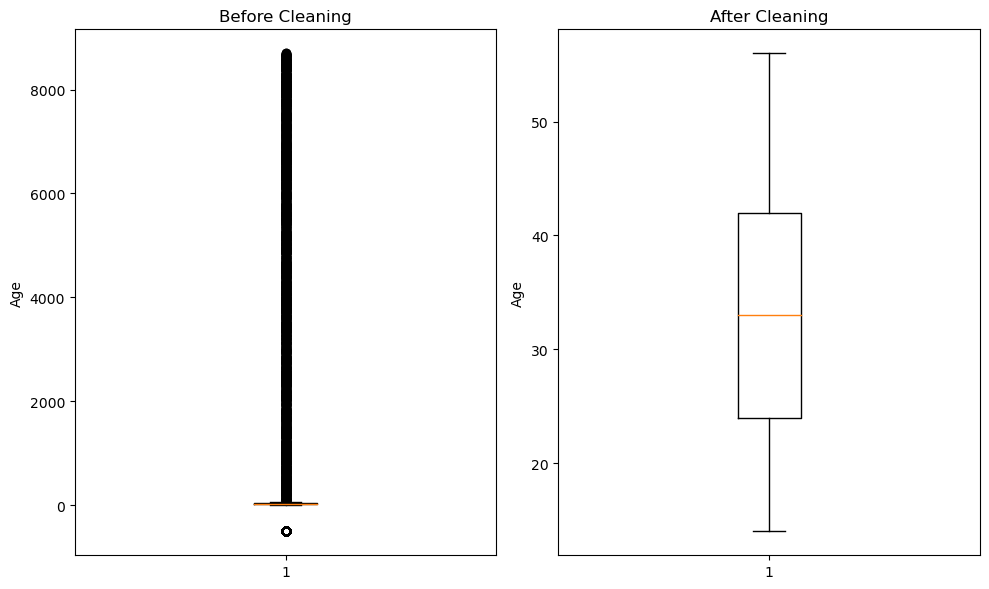

In [164]:
data['Age'] = data['Age'].str.replace('_', '')
data['Age'] = data['Age'].replace("", np.nan)
data['Age'] = data['Age'].astype(float)
print('Before Cleaning:')
print(data['Age'].describe())
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data['Age'])
plt.ylabel('Age')
plt.title('Before Cleaning')

grouped_data = data.groupby('Customer_ID')
data['Age'] = grouped_data['Age'].transform(lambda g: replace_or_drop(g, 0, 56))

data.dropna(subset=['Age'], inplace = True)
data.reset_index(drop = True, inplace = True)
print('After Cleaning:')
print(data['Age'].describe())
plt.subplot(1, 2, 2)
plt.boxplot(data['Age'])
plt.title('After Cleaning')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

As you can see, after cleaning the feature, the distribution of values appears a lot more normal. Having a normal distribution of values will definitely be more useful as we continue to utilize this dataset, ensuring that fake/outlier values do not skew any results we have.

**As we move through all the features, we work through a similar process of filling in NaN values and fixing false, fake, and outlier values.**

### Annual Income

The data type of annual income started out as a string. Some records had an income value that made sense, but the number had an underscore after it, which made it a string (similar to the age feature). Therefore, we replaced all the underscore characters to be nothing. After this was taken care of, we converted the feature from string to float, which is what annual income is supposed to be.

Before cleaning, we printed out the description of the values in the feature. We didn't notice any outliers and there are no records that have NaN for annual income, so that should be it for cleaning up the annual income feature.

In [165]:
data['Annual_Income'] = data['Annual_Income'].str.replace('_', '')
data['Annual_Income'] = data['Annual_Income'].replace("", np.nan)
data['Annual_Income'] = data['Annual_Income'].astype(float)
print(data['Annual_Income'].describe())

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64


### Monthly Inhand Salary

Montly Inhand Salary was already a float value, so we did not need to change that for this feature. There were some NaN values, however, so we wanted to replace those values with the mode of the specific customer's monthly inhand salary. 

If there are still NaN values left after the grouping and calling replace_or_drop, this means that the group itself had a mode that was a big outlier, so we want to drop this customer as a whole.

Normal range for this feature: 0 - 15205

As you can see, the count value went up from 84,998 to 100,000 because the records with NaN monthly inhand salaries are now filled with the customer's monthly inhand salary mode.

In [166]:
print(data['Monthly_Inhand_Salary'].describe())

grouped_data = data.groupby('Customer_ID')
data['Monthly_Inhand_Salary'] = grouped_data['Monthly_Inhand_Salary'].transform(lambda g: replace_or_drop(g, 0, 15205))

data.dropna(subset=['Monthly_Inhand_Salary'], inplace = True)
data.reset_index(drop = True, inplace = True)

print(data['Monthly_Inhand_Salary'].describe())

count    84998.000000
mean      4194.170850
std       3183.686167
min        303.645417
25%       1625.568229
50%       3093.745000
75%       5957.448333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64
count    100000.000000
mean       4198.350924
std        3187.402015
min         303.645417
25%        1626.761667
50%        3095.978333
75%        5961.637500
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64


### Number of Bank Accounts

We first had to change the type of number of bank accounts to be a float instead of a string. Similar to the previous features, there were records with outlier values (negative numbers and numbers extremely high like 1798). We needed to replace these values with the mode of the customer's number of bank accounts. However, if the mode for the customer was still an outlier, then we dropped the entire customer (all 8 rows) from the dataset. 

Normal range for this feature: 0 - 10

As you can see, there were some records that got dropped completely.

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64
count    99968.000000
mean         5.370469
std          2.591730
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Num_Bank_Accounts, dtype: float64


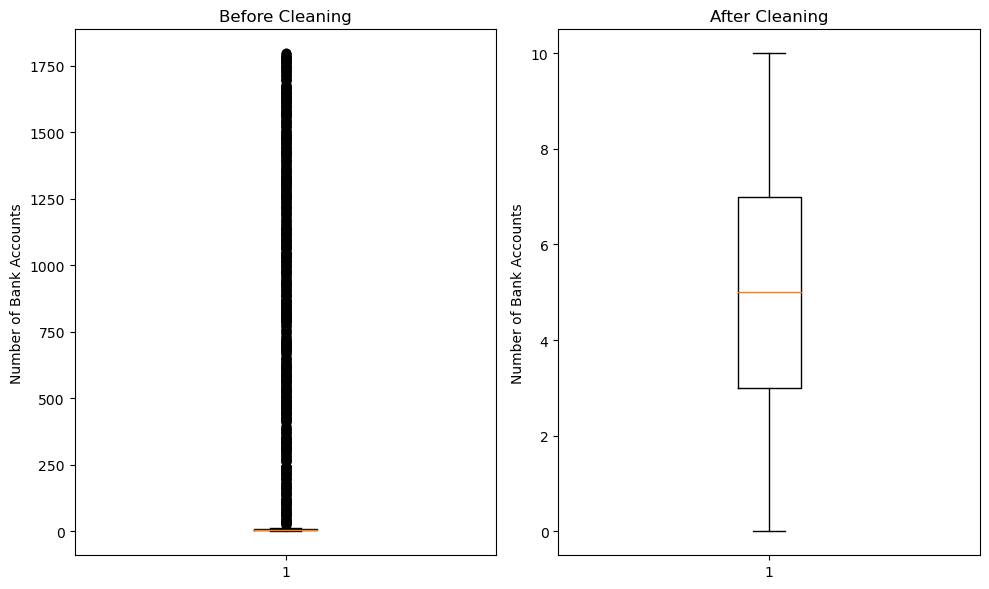

In [167]:
data['Num_Bank_Accounts'] = data['Num_Bank_Accounts'].astype(float)
print(data['Num_Bank_Accounts'].describe())
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data['Num_Bank_Accounts'])
plt.ylabel('Number of Bank Accounts')
plt.title('Before Cleaning')

grouped_data = data.groupby('Customer_ID')
data['Num_Bank_Accounts'] = grouped_data['Num_Bank_Accounts'].transform(lambda g: replace_or_drop(g, 0, 10))

data.dropna(subset = ['Num_Bank_Accounts'], inplace = True)
data.reset_index(drop = True, inplace = True)

print(data['Num_Bank_Accounts'].describe())
plt.subplot(1, 2, 2)
plt.boxplot(data['Num_Bank_Accounts'])
plt.title('After Cleaning')
plt.ylabel('Number of Bank Accounts')

plt.tight_layout()
plt.show()

### Number of Credit Cards

We first had to change the type of number of credit cards to be a float instead of a string. Similar to the previous features, there were records with outlier values (really extreme values like 1499). We needed to replace these values with the mode of the customer's number of credit cards. However, if the mode for the customer was still an outlier, then we dropped the entire customer (all 8 rows) from the dataset. 

Normal range for this feature: 0 - 10

As you can see, there were some records that got dropped completely.

count    99968.000000
mean        22.478383
std        129.076914
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max       1499.000000
Name: Num_Credit_Card, dtype: float64
count    99928.000000
mean         5.531663
std          2.064943
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Num_Credit_Card, dtype: float64


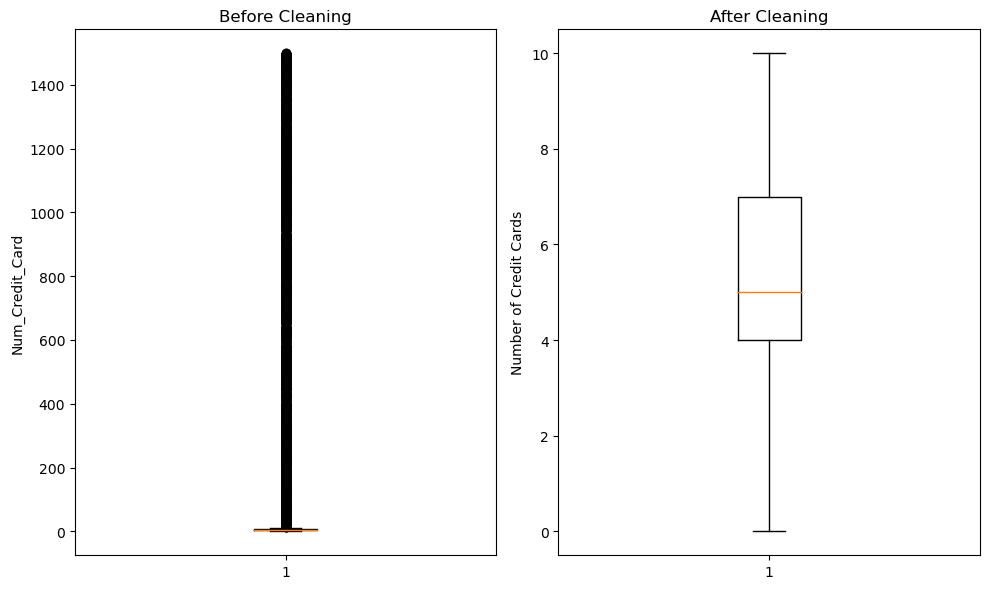

In [168]:
data['Num_Credit_Card'] = data['Num_Credit_Card'].astype(float)
print(data['Num_Credit_Card'].describe())
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data['Num_Credit_Card'])
plt.ylabel('Num_Credit_Card')
plt.title('Before Cleaning')

grouped_data = data.groupby('Customer_ID')
data['Num_Credit_Card'] = grouped_data['Num_Credit_Card'].transform(lambda g: replace_or_drop(g, 0, 10))

data.dropna(subset=['Num_Credit_Card'], inplace = True)
data.reset_index(drop = True, inplace = True)

print(data["Num_Credit_Card"].describe())
plt.subplot(1, 2, 2)
plt.boxplot(data['Num_Credit_Card'])
plt.title('After Cleaning')
plt.ylabel('Number of Credit Cards')

plt.tight_layout()
plt.show()

### Interest Rate

We first had to change the type of interest to be a float instead of a string. Similar to the previous features, there were records with outlier values (really extreme values like 5797). It doesn't make sense to have an interest rate that high, so this was considered an outlier/fake data. We needed to replace these values with the mode of the customer's interest rate. However, if the mode for the customer was still an outlier, then we dropped the entire customer (all 8 rows) from the dataset. 

Normal range for this feature: 0 - 36

We didn't know what values were reasonable for the credit card interest rate, but after doing some research, we found that the max credit card rate right now is 36%, which is why we considered 0 to 36 as the range of possible values.

No records were dropped because of this feature.

count    99928.000000
mean        72.472400
std        466.454174
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max       5797.000000
Name: Interest_Rate, dtype: float64
count    99928.000000
mean        14.532543
std          8.741033
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate, dtype: float64


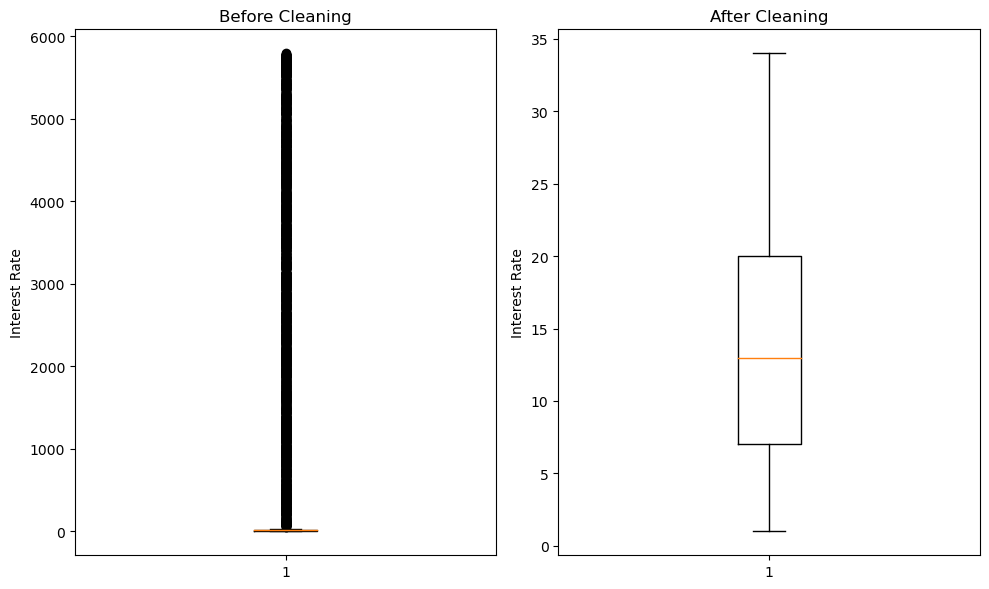

In [169]:
data['Interest_Rate'] = data['Interest_Rate'].astype(float)
print(data["Interest_Rate"].describe())
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data['Interest_Rate'])
plt.ylabel('Interest Rate')
plt.title('Before Cleaning')

grouped_data = data.groupby('Customer_ID')
data['Interest_Rate'] = grouped_data['Interest_Rate'].transform(lambda g: replace_or_drop(g, 0, 36))

data.dropna(subset=['Interest_Rate'], inplace = True)
data.reset_index(drop = True, inplace = True)

print(data["Interest_Rate"].describe())
plt.subplot(1, 2, 2)
plt.boxplot(data['Interest_Rate'])
plt.title('After Cleaning')
plt.ylabel('Interest Rate')

plt.tight_layout()
plt.show()

### Number of Loans

We first had to change the type of number of loans to be a float instead of a string. This feature also had the issue of having underscores after the numbers for some records, which is something we needed to fix. Similar to the previous features, there were records with outlier values (negative numbers and numbers extremely high like 1496). We needed to replace these values with the mode of the customer's number of loans. However, if the mode for the customer was still an outlier, then we dropped the entire customer (all 8 rows) from the dataset. 

Normal range for this feature: 0 - 10

There were no records dropped when cleaning up number of loans.

count    99928.00000
mean         3.01366
std         62.66703
min       -100.00000
25%          1.00000
50%          3.00000
75%          5.00000
max       1496.00000
Name: Num_of_Loan, dtype: float64
count    99928.000000
mean         3.532784
std          2.446580
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan, dtype: float64


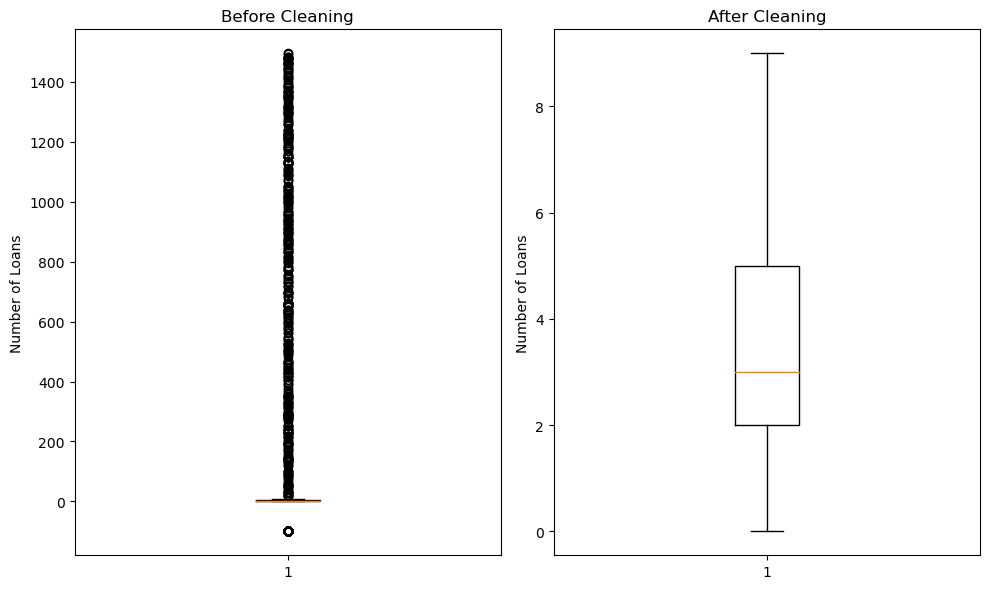

In [170]:
data['Num_of_Loan'] = data['Num_of_Loan'].str.replace('_', '')
data['Num_of_Loan'] = data['Num_of_Loan'].replace("", np.nan)
data['Num_of_Loan'] = data['Num_of_Loan'].astype(float)
print(data['Num_of_Loan'].describe())
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data['Num_of_Loan'])
plt.ylabel('Number of Loans')
plt.title('Before Cleaning')

grouped_data = data.groupby('Customer_ID')
data['Num_of_Loan'] = grouped_data['Num_of_Loan'].transform(lambda g: replace_or_drop(g, 0, 10))

data.dropna(subset=['Num_of_Loan'], inplace = True)
data.reset_index(drop = True, inplace = True)

print(data['Num_of_Loan'].describe())
plt.subplot(1, 2, 2)
plt.boxplot(data['Num_of_Loan'])
plt.title('After Cleaning')
plt.ylabel('Number of Loans')

plt.tight_layout()
plt.show()

### Delay from Due Date

We first had to change the delay from due date feature to be a float instead of a string. There were records with outlier values (negative values), which simply do not make sense. We needed to replace these values with the mode of the customer's delay from due date. However, if the mode for the customer was still an outlier, then we dropped the entire customer (all 8 rows) from the dataset. 

Normal range for this feature: 0 - 67

As you can see, there were some records that got dropped completely. We went from 99928 to 99888 records.

count    99928.000000
mean        21.064566
std         14.855445
min         -5.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64
count    99888.000000
mean        21.093885
std         14.822143
min          0.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64


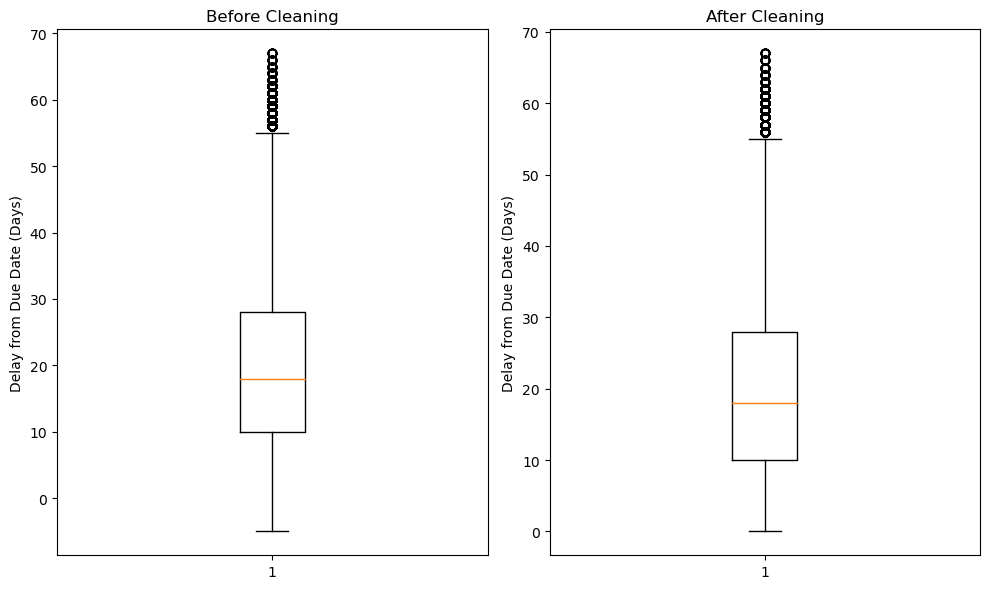

In [171]:
data['Delay_from_due_date'] = data['Delay_from_due_date'].astype(float)
print(data["Delay_from_due_date"].describe())
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data['Delay_from_due_date'])
plt.ylabel('Delay from Due Date (Days)')
plt.title('Before Cleaning')

grouped_data = data.groupby('Customer_ID')
data['Delay_from_due_date'] = grouped_data['Delay_from_due_date'].transform(lambda g: replace_or_drop(g, 0, 67))

data.dropna(subset=['Delay_from_due_date'], inplace = True)
data.reset_index(drop = True, inplace = True)

print(data["Delay_from_due_date"].describe())
plt.subplot(1, 2, 2)
plt.boxplot(data['Delay_from_due_date'])
plt.title('After Cleaning')
plt.ylabel('Delay from Due Date (Days)')

plt.tight_layout()
plt.show()

### Number of Delayed Payment

We first had to change the type of number of delayed payments to be a float instead of a string. After printing out the description of the features before we cleaned, we noticed the negative values and extreme values like 4397, which don't really make sense. We needed to replace these values with the mode of the customer's number of delayed payments. However, if the mode for the customer was still an outlier, then we dropped the entire customer (all 8 rows) from the dataset. 

Normal range for this feature: 0 - 31

The count variable increased, which means we were able to fill in some of the NaN values with values that make sense for the particular customer.

count    92894.000000
mean        30.912244
std        225.911493
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64
count    99776.000000
mean        13.342397
std          6.258616
min          0.000000
25%          9.000000
50%         14.000000
75%         18.000000
max         28.000000
Name: Num_of_Delayed_Payment, dtype: float64


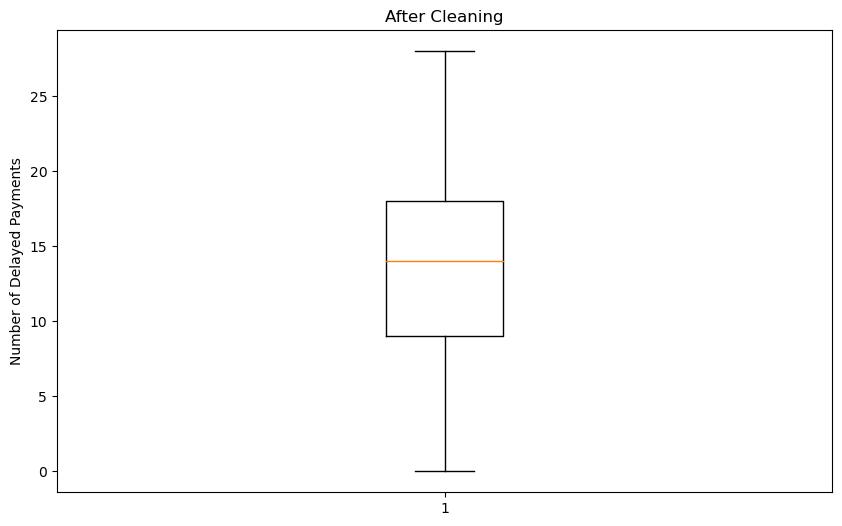

In [172]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.replace('_', '')
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].replace("", np.nan)
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype(float)
print(data['Num_of_Delayed_Payment'].describe())

grouped_data = data.groupby('Customer_ID')
data['Num_of_Delayed_Payment'] = grouped_data['Num_of_Delayed_Payment'].transform(lambda g: replace_or_drop(g, 0, 31))

data.dropna(subset=['Num_of_Delayed_Payment'], inplace = True)
data.reset_index(drop = True, inplace = True)

print(data['Num_of_Delayed_Payment'].describe())
plt.figure(figsize=(10, 6))
plt.boxplot(data['Num_of_Delayed_Payment'])
plt.title('After Cleaning')
plt.ylabel('Number of Delayed Payments')

plt.show()

### Changed Credit Limit

We first had to change the type of changed credit limit to be a float instead of a string. This had the same issue with the underscore, so we needed to fix that first. We didn't find any outliers in this feature as negative values are allowed since this means a decrease in changed credit limit.  

Normal range for this feature: -6.5 - 37

As you can see, there were some records that now don't have NaN values for changed credit limit.

count    97693.000000
mean        10.393692
std          6.791314
min         -6.490000
25%          5.340000
50%          9.410000
75%         14.880000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64
count    99776.000000
mean        10.393665
std          6.785547
min         -6.490000
25%          5.340000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64


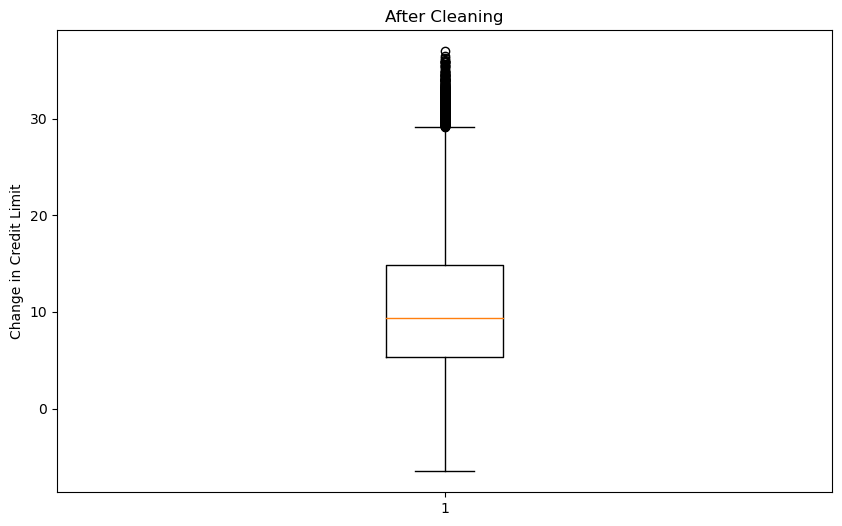

In [173]:
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].str.replace('_', '')
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].replace("", np.nan)
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(float)
print(data['Changed_Credit_Limit'].describe())


grouped_data = data.groupby('Customer_ID')
data['Changed_Credit_Limit'] = grouped_data['Changed_Credit_Limit'].transform(lambda g: replace_or_drop(g, -6.5, 37))

data.dropna(subset=['Changed_Credit_Limit'], inplace = True)
data.reset_index(drop = True, inplace = True)

print(data['Changed_Credit_Limit'].describe())
plt.figure(figsize=(10, 6))
plt.boxplot(data['Changed_Credit_Limit'])
plt.title('After Cleaning')
plt.ylabel('Change in Credit Limit')

plt.show()

### Number of Credit Inquiries

Number of Credit Inquiries was already a float so there was no need to convert the data type of this feature. Furthermore, similar to the other features, we want to replace any NaN values and outlier values with the mode for number of credit inquiries for each specific customer. In the dataset, the value 2597 seemed unrealistic and fake for number of credit inquiries, so we decided that this was an outlier value.

Normal Value: 0 - 12

Since there were customers that had an outlier mode all together, this customer was dropped. As you can see, we lost some records due to the mode being an outlier for the customer.

count    97819.000000
mean        27.788967
std        193.342315
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64
count    96056.000000
mean         5.433809
std          3.500103
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         12.000000
Name: Num_Credit_Inquiries, dtype: float64


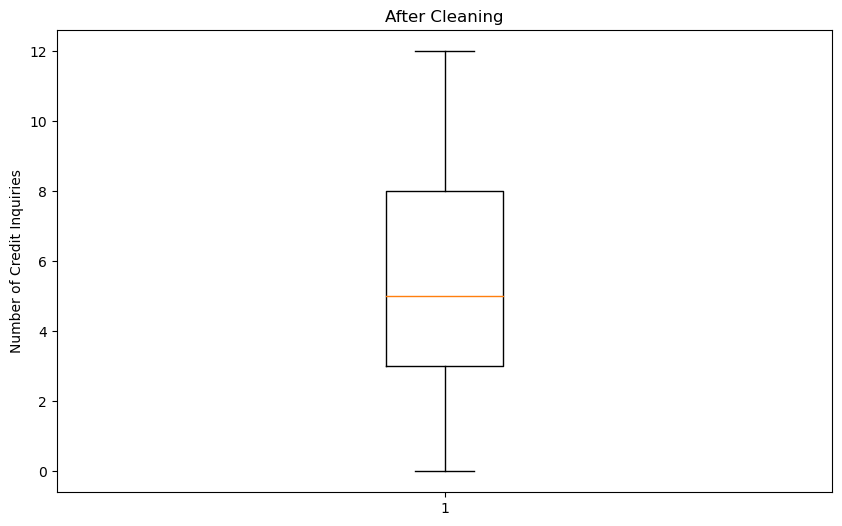

In [174]:
print(data['Num_Credit_Inquiries'].describe())

grouped_data = data.groupby('Customer_ID')
data['Num_Credit_Inquiries'] = grouped_data['Num_Credit_Inquiries'].transform(lambda g: replace_or_drop(g, 0, 12))

data.dropna(subset=['Num_Credit_Inquiries'], inplace = True)
data.reset_index(drop = True, inplace = True)

print(data['Num_Credit_Inquiries'].describe())
plt.figure(figsize=(10, 6))
plt.boxplot(data['Num_Credit_Inquiries'])
plt.title('After Cleaning')
plt.ylabel('Number of Credit Inquiries')

plt.show()

### Outstanding Debt

Outstanding Debt had the same issue with the underscores after numbers, so that was something that needed to be cleaned, which allowed us to then convert the values into floating values. We then transform the column to replace any outliers and NaN with the same logic we have been using. 

Normal Value: 0 - 5000

In [175]:
data['Outstanding_Debt'] = data['Outstanding_Debt'].str.replace('_', '')
data['Outstanding_Debt'] = data['Outstanding_Debt'].replace("", np.nan)
data['Outstanding_Debt'] = data['Outstanding_Debt'].astype(float)
print(data['Outstanding_Debt'].describe())

count    96056.000000
mean      1374.910821
std       1126.104035
min          0.230000
25%        550.220000
50%       1123.230000
75%       1811.960000
max       4998.070000
Name: Outstanding_Debt, dtype: float64


### Credit Utilization Ratio

Credit Utilization Ratio was already a float so there was no need to convert the data type of this feature. Furthermore, similar to the other features, we want to replace any NaN values and outlier values with the mode for credit utilization ratio for each specific customer.

Normal Value: 20 - 50

Since there were customers that had an outlier mode all together, this customer was dropped. However, there were no records dropped when cleaning this feature.

In [176]:
print(data['Credit_Utilization_Ratio'].describe())

grouped_data = data.groupby('Customer_ID')
data['Credit_Utilization_Ratio'] = grouped_data['Credit_Utilization_Ratio'].transform(lambda g: replace_or_drop(g, 20, 50))

data.dropna(subset=['Credit_Utilization_Ratio'], inplace = True)
data.reset_index(drop = True, inplace = True)

print(data['Credit_Utilization_Ratio'].describe())

count    96056.000000
mean        32.308582
std          5.119054
min         20.000000
25%         28.075516
50%         32.329881
75%         36.518995
max         50.000000
Name: Credit_Utilization_Ratio, dtype: float64
count    96056.000000
mean        32.308384
std          5.118738
min         20.000000
25%         28.075516
50%         32.329582
75%         36.518741
max         49.564519
Name: Credit_Utilization_Ratio, dtype: float64


### Total EMI Per Month

Although the statistics remain the same, a few numbers here and there could've changed.

In [177]:
print(data['Total_EMI_per_month'].describe())

grouped_data = data.groupby('Customer_ID')
data['Total_EMI_per_month'] = grouped_data['Total_EMI_per_month'].transform(lambda g: replace_or_drop(g, 0, 90000))

data.dropna(subset=['Total_EMI_per_month'], inplace = True)
data.reset_index(drop = True, inplace = True)

print(data['Total_EMI_per_month'].describe())

count    96056.000000
mean      1402.733043
std       8304.076851
min          0.000000
25%         29.605318
50%         68.427060
75%        160.191974
max      82331.000000
Name: Total_EMI_per_month, dtype: float64
count    96056.000000
mean      1402.733043
std       8304.076851
min          0.000000
25%         29.605318
50%         68.427060
75%        160.191974
max      82331.000000
Name: Total_EMI_per_month, dtype: float64


### Amount Invested Monthly

The biggest thing we needed to change for amount invested monthly was changing the data type of the feature. Furthermore, we needed to impute the amount invested monthly for a customer into the NaN values as this feature had a lot of NaN values within its column.

count    91752.000000
mean       639.769567
std       2043.966987
min          0.000000
25%         75.240647
50%        137.184427
75%        268.975996
max      10000.000000
Name: Amount_invested_monthly, dtype: float64
count    96056.000000
mean       631.070128
std       2037.974177
min          0.000000
25%         71.701968
50%        131.812904
75%        259.900991
max      10000.000000
Name: Amount_invested_monthly, dtype: float64


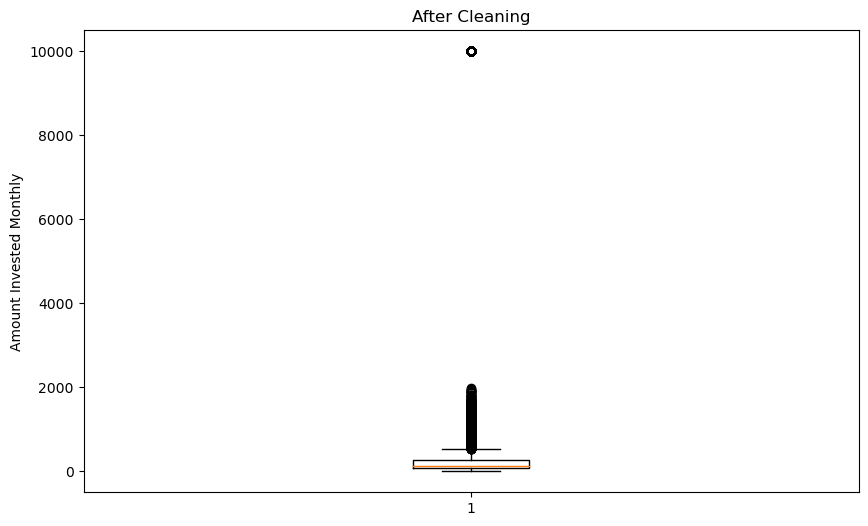

In [178]:
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].str.replace('_', '')
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].replace("", np.nan)
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].astype(float)
print(data['Amount_invested_monthly'].describe())

grouped_data = data.groupby('Customer_ID')
data['Amount_invested_monthly'] = grouped_data['Amount_invested_monthly'].transform(lambda g: replace_or_drop(g, 0, 10000))
# data['Amount_invested_monthly'] = grouped_data['Amount_invested_monthly'].transform(lambda g: replace_or_drop(g, 0, 2000))

data.dropna(subset=['Amount_invested_monthly'], inplace = True)
data.reset_index(drop = True, inplace = True)

print(data['Amount_invested_monthly'].describe())
plt.figure(figsize=(10, 6))
plt.boxplot(data['Amount_invested_monthly'])
plt.title('After Cleaning')
plt.ylabel('Amount Invested Monthly')

plt.show()

### Monthly Balance

This feature first needed to be fixed by removing the underscores next to any numbers that got added into the dataset. We, then, could transform the feature into a float instead of a string. This feature had the biggest outliers we have seen. A monthly balance of -3.33e26 is so unreasonable and is fake data, so we had to ensure we got replaced or got rid of all the records with values this extreme.

Normal value for monthly balance: 0 - 1580

We were able to recover some records that had NaN values originally that we replaced with the mode of the monthly balance for a specific customer.

count    9.326600e+04
mean    -2.859206e+22
std      3.087065e+24
min     -3.333333e+26
25%      2.717432e+02
50%      3.395629e+02
75%      4.756614e+02
max      1.602041e+03
Name: Monthly_Balance, dtype: float64
count    94328.000000
mean       403.757802
std        215.963790
min          0.007760
25%        270.287890
50%        338.317664
75%        473.762700
max       1576.288935
Name: Monthly_Balance, dtype: float64


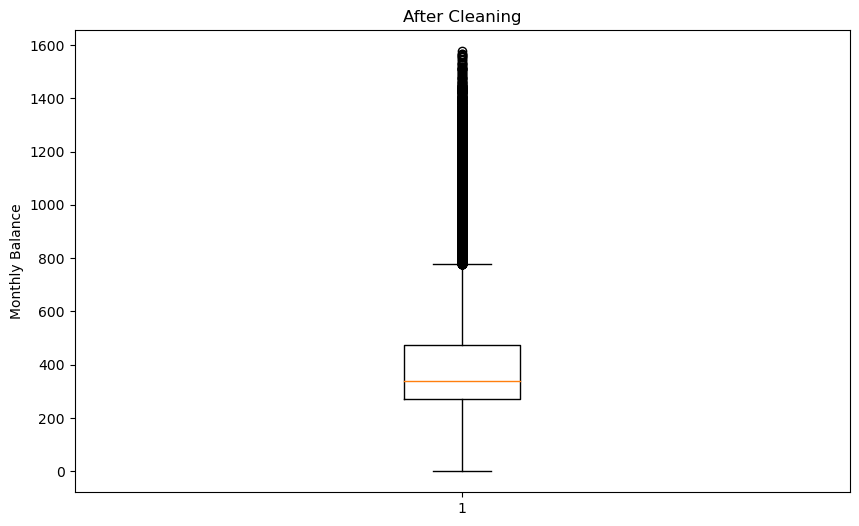

In [179]:
data['Monthly_Balance'] = data['Monthly_Balance'].str.replace('_', '')
data['Monthly_Balance'] = data['Monthly_Balance'].replace("", np.nan)
data['Monthly_Balance'] = data['Monthly_Balance'].astype(float)
print(data['Monthly_Balance'].describe())

grouped_data = data.groupby('Customer_ID')
data['Monthly_Balance'] = grouped_data['Monthly_Balance'].transform(lambda g: replace_or_drop(g, 0, 1.58e+03))

data.dropna(subset=['Monthly_Balance'], inplace = True)
data.reset_index(drop = True, inplace = True)

print(data['Monthly_Balance'].describe())
plt.figure(figsize=(10, 6))
plt.boxplot(data['Monthly_Balance'])
plt.title('After Cleaning')
plt.ylabel('Monthly Balance')

plt.show()

## Feature Engineering

### Credit History Age

It was hard to use this feature as it came in the dataset because it was a string that said how many years and months. We figured that we could simply convert this feature to be the total number of months for credit history age, instead of being in terms of both years and months. We have this function called years_months_to_months, which essentially parses through the string, and converts the total number of months from it. Each record's credit history age is then replaced by the number of months instead. 

Once we engineer this feature to be total number of months, we then transform it the same way we did with other features to get rid of any NaN and outlier values.

Normal number of months: 0 - 405

In [180]:
def years_months_to_months(s):
    if s == "NA":
        return np.nan
    parts = s.split(' ')
    years = int(parts[0])
    months = int(parts[3])
    total_months = years * 12 + months
    return total_months

data = data[data['Credit_History_Age'].apply(lambda x: isinstance(x, str))]

data['Credit_History_Age'] = data['Credit_History_Age'].apply(years_months_to_months).astype(float)

grouped_data = data.groupby('Customer_ID')
data['Credit_History_Age'] = grouped_data['Credit_History_Age'].transform(lambda g: replace_or_drop(g, 0, 405))

data.dropna(subset=['Credit_History_Age'], inplace = True)
data.reset_index(drop = True, inplace = True)

data.head()
print(data['Credit_History_Age'].describe())

C:\Users\ayujv\AppData\Local\Temp\ipykernel_16112\4162071296.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Credit_History_Age'] = data['Credit_History_Age'].apply(years_months_to_months).astype(float)


count    85819.000000
mean       224.724257
std         99.196315
min          1.000000
25%        150.000000
50%        223.000000
75%        306.000000
max        404.000000
Name: Credit_History_Age, dtype: float64


### Occupation

Occupation is a categorical variable that takes in values of different jobs like "Lawyer", "Teacher", "Engineer", etc. We want to be able to use this feature in our machine learning model, and there are some models that require numbers for inputs. Therefore, we can one hot encode this feature to represent a categorical variable as a numerical value within the dataset. Some records have no occupation in which we set the title to Unemployed.

Occupation
Unemployed       6076
Lawyer           5589
Architect        5464
Engineer         5436
Scientist        5414
Teacher          5388
Media_Manager    5358
Mechanic         5336
Entrepreneur     5335
Accountant       5322
Journalist       5289
Developer        5288
Doctor           5278
Manager          5152
Musician         5101
Writer           4993
Name: count, dtype: int64


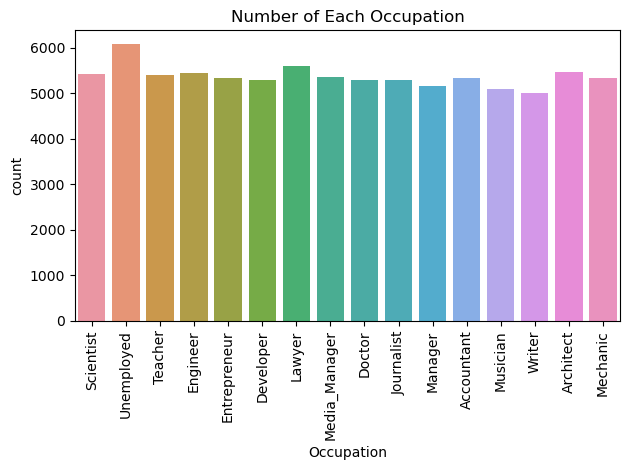

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unemployed,Occupation_Writer
0,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,_,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,Good,809.98,27.262259,270.0,No,49.574949,62.430172,!@9#%8,340.479212,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [181]:
data['Occupation'].replace("_______", "Unemployed", inplace=True)
print(data['Occupation'].value_counts())
# One hot encode:
occupation_dummies = pd.get_dummies(data['Occupation'], prefix = 'Occupation')
data = pd.concat([data, occupation_dummies], axis = 1)
sns.countplot(x = 'Occupation', data = data)
plt.title('Number of Each Occupation')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()
data.drop('Occupation', axis = 1, inplace = True)
data.head()

### Type of Loan

This is another categorical feature that needs to be one hot encoded, so that we can use it in our machine learning models. This feature was slightly different because each record could have multiple types of loans. For instance, some records for this feature might say 'Auto Loan, Home Equity Loan, Personal Loan' which means that this customer has all of these types of loans. We needed to be able to parse through the String and ensure that each loan was marked as true if the customer had it listed in their type of loan.

In [182]:
all_loans = set()
data['Type_of_Loan'].dropna().str.split(',').apply(lambda x: [all_loans.add(loan.strip().replace('and ', '').replace('And ', '')) for loan in x])

# Function to create one-hot encodings
def encode_loans(row):
    if pd.isna(row):
        return pd.Series({loan: 0 for loan in all_loans})
    loans = [loan.strip().replace(' and', '').replace('And', '') for loan in row.split(',')]
    return pd.Series({loan: (1 if loan in loans else 0) for loan in all_loans})

loan_encoded = data['Type_of_Loan'].apply(encode_loans)
data = data.join(loan_encoded)
data.drop('Type_of_Loan', axis=1, inplace=True)
data.head()

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unemployed,Occupation_Writer,Credit-Builder Loan,Personal Loan,Mortgage Loan,Auto Loan,Not Specified,Student Loan,Debt Consolidation Loan,Payday Loan,Home Equity Loan
0,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,_,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0
1,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0
2,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0
3,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0
4,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,8.0,4.0,9.27,4.0,Good,809.98,27.262259,270.0,No,49.574949,62.430172,!@9#%8,340.479212,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0


In [183]:
# Function to replace invalid strings with the mode if valid.
def replace_invalid_with_mode(group, invalid_str):
    mode_value = group.mode()
    if mode_value.empty or (mode_value[0] == invalid_str):
        return pd.Series([None] * len(group))  # Mark group for deletion if no valid mode or mode is invalid.
    return group.replace(invalid_str, mode_value[0])

### Credit Mix

Credit Mix is another categorical feature that requires one hot encoding. Before we one hot encoded, we ensured that there were no NaN values by replacing any of these values with the most occuring credit mix for a specific customer. After, we one hot encode this feature, which has Good, Bad, or Standard.

Credit_Mix
Standard    31822
Good        21638
_           17306
Bad         15053
Name: count, dtype: int64


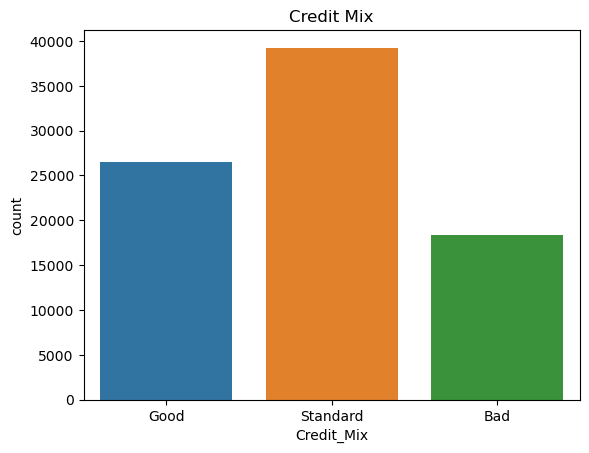

Credit_Mix
Standard    39247
Good        26505
Bad         18384
Name: count, dtype: int64


,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unemployed,Occupation_Writer,Credit-Builder Loan,Personal Loan,Mortgage Loan,Auto Loan,Not Specified,Student Loan,Debt Consolidation Loan,Payday Loan,Home Equity Loan,Credit Mix_Bad,Credit Mix_Good,Credit Mix_Standard
0,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0,False,True,False
1,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0,False,True,False
2,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0,False,True,False
3,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0,False,True,False
4,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,8.0,4.0,9.27,4.0,809.98,27.262259,270.0,No,49.574949,62.430172,!@9#%8,340.479212,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0,False,True,False


In [184]:
print(data['Credit_Mix'].value_counts())

grouped_data = data.groupby('Customer_ID')
data['Credit_Mix'] = grouped_data['Credit_Mix'].transform(lambda x: replace_invalid_with_mode(x, '_'))
sns.countplot(x = 'Credit_Mix', data = data)
plt.title('Credit Mix')
plt.show()

data.dropna(subset=['Credit_Mix'], inplace = True)

print(data['Credit_Mix'].value_counts())

# One hot encode:
occupation_dummies = pd.get_dummies(data['Credit_Mix'], prefix = 'Credit Mix')
data = pd.concat([data, occupation_dummies], axis = 1)
data.drop('Credit_Mix', axis = 1, inplace = True)

data.head()

### Payment of Minimum Amount

Payment of Minimum Amount is another categorical feature that requires one hot encoding. Before we one hot encoded, we ensured that there were no NM values (NaN values in this case) by replacing any of these values with the most occuring credit mix for a specific customer. After, we one hot encode this feature, which is either Yes or No.

Payment_of_Min_Amount
Yes    42876
No     31162
NM     10098
Name: count, dtype: int64


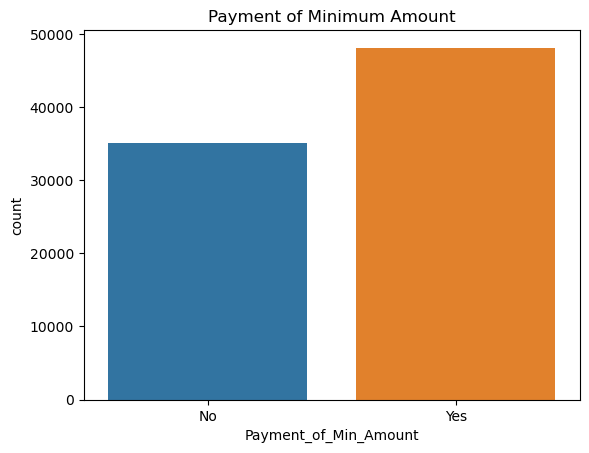

Payment_of_Min_Amount
Yes    48136
No     35142
Name: count, dtype: int64


,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unemployed,Occupation_Writer,Credit-Builder Loan,Personal Loan,Mortgage Loan,Auto Loan,Not Specified,Student Loan,Debt Consolidation Loan,Payday Loan,Home Equity Loan,Credit Mix_Bad,Credit Mix_Good,Credit Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0,False,True,False,True,False
1,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0,False,True,False,True,False
2,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0,False,True,False,True,False
3,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0,False,True,False,True,False
4,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,8.0,4.0,9.27,4.0,809.98,27.262259,270.0,49.574949,62.430172,!@9#%8,340.479212,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0,False,True,False,True,False


In [185]:
print(data['Payment_of_Min_Amount'].value_counts())

grouped_data = data.groupby('Customer_ID')
data['Payment_of_Min_Amount'] = grouped_data['Payment_of_Min_Amount'].transform(lambda x: replace_invalid_with_mode(x, 'NM'))
sns.countplot(x = 'Payment_of_Min_Amount', data = data)
plt.title('Payment of Minimum Amount')
plt.show()

data.dropna(subset=['Payment_of_Min_Amount'], inplace = True)

print(data['Payment_of_Min_Amount'].value_counts())

# One hot encode:
occupation_dummies = pd.get_dummies(data['Payment_of_Min_Amount'], prefix = 'Payment_of_Min_Amount')
data = pd.concat([data, occupation_dummies], axis = 1)
data.drop('Payment_of_Min_Amount', axis = 1, inplace = True)

data.head()

### Payment Behavior

Payment Behavior is the last categorical feature that requires one hot encoding. Before we one hot encoded, we ensured that there were no NaN values, which were represented by !@9#%8, by replacing any of these values with the most occuring payment behavior type for a specific customer. After, we one hot encode this feature, which has several different options that relate to the behavior of a payment.

Payment_Behaviour
Low_spent_Small_value_payments      21085
High_spent_Medium_value_payments    14685
High_spent_Large_value_payments     11571
Low_spent_Medium_value_payments     11509
High_spent_Small_value_payments      9469
Low_spent_Large_value_payments       8662
!@9#%8                               6297
Name: count, dtype: int64


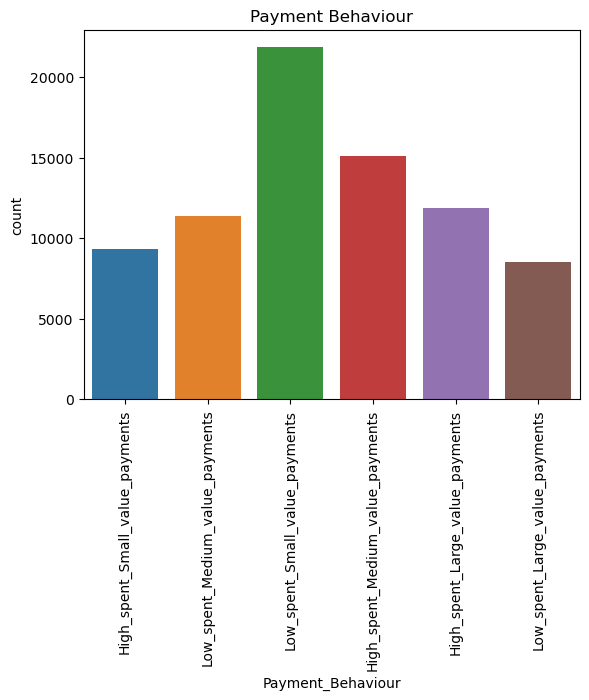

Payment_Behaviour
Low_spent_Small_value_payments      21847
High_spent_Medium_value_payments    15072
High_spent_Large_value_payments     11901
Low_spent_Medium_value_payments     11383
High_spent_Small_value_payments      9311
Low_spent_Large_value_payments       8498
Name: count, dtype: int64


,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unemployed,Occupation_Writer,Credit-Builder Loan,Personal Loan,Mortgage Loan,Auto Loan,Not Specified,Student Loan,Debt Consolidation Loan,Payday Loan,Home Equity Loan,Credit Mix_Bad,Credit Mix_Good,Credit Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0,False,True,False,True,False,False,False,True,False,False,False
1,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,81.699521,331.209863,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0,False,True,False,True,False,False,False,False,False,True,False
2,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,199.458074,223.451310,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0,False,True,False,True,False,False,False,False,False,False,True
3,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,41.420153,341.489231,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0,False,True,False,True,False,False,True,False,False,False,False
4,CUS_0xd40,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,8.0,4.0,9.27,4.0,809.98,27.262259,270.0,49.574949,62.430172,340.479212,Good,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,1,0,1,0,0,0,0,0,False,True,False,True,False,False,False,False,False,False,True


In [186]:
print(data['Payment_Behaviour'].value_counts())

grouped_data = data.groupby('Customer_ID')
data['Payment_Behaviour'] = grouped_data['Payment_Behaviour'].transform(lambda x: replace_invalid_with_mode(x, '!@9#%8'))
sns.countplot(x = 'Payment_Behaviour', data = data)
plt.title('Payment Behaviour')
plt.xticks(rotation = 90)
plt.show()

data.dropna(subset=['Payment_Behaviour'], inplace = True)

print(data['Payment_Behaviour'].value_counts())

# One hot encode:
occupation_dummies = pd.get_dummies(data['Payment_Behaviour'], prefix = 'Payment_Behaviour')
data = pd.concat([data, occupation_dummies], axis = 1)
data.drop('Payment_Behaviour', axis = 1, inplace = True)

data.head()

### Downsampling Data

Due to class imbalances, we wanted every label (Good, Standard, and Poor) to be represented equally. As a result, we cut down each label to have 14,283 records. We found that decreasing this value resulted in lower accuracies due to models being trained on less data.

Credit_Score
Standard    41945
Poor        21784
Good        14283
Name: count, dtype: int64


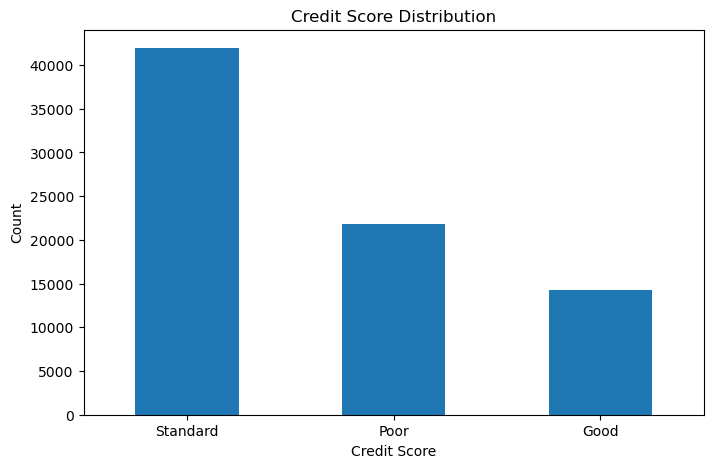

Credit_Score
Good        14283
Poor        14283
Standard    14283
Name: count, dtype: int64


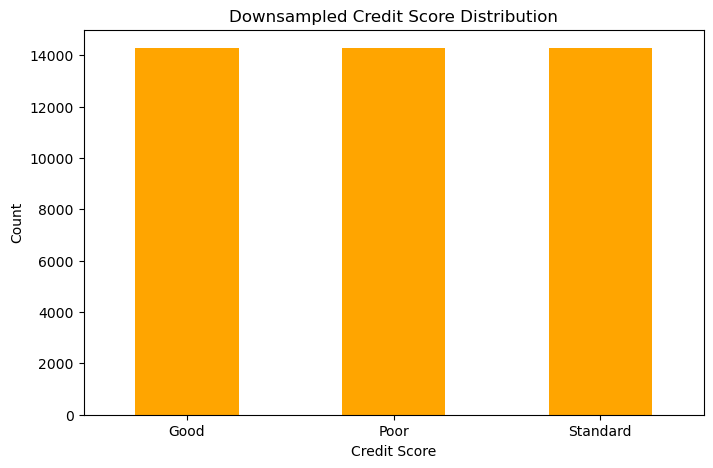

In [187]:
credit_score_counts = data['Credit_Score'].value_counts()
print(credit_score_counts)
plt.figure(figsize = (8, 5))
credit_score_counts.plot(kind='bar')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

downsampled_data = data.groupby('Credit_Score').sample(n = 14283, random_state = 8)
downsampled_counts = downsampled_data['Credit_Score'].value_counts()
print(downsampled_counts)
plt.figure(figsize=(8, 5))
downsampled_counts.plot(kind = 'bar', color = 'orange')
plt.title('Downsampled Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

### Correlation Matrix

We wanted to see any relationships between features. We use this information at the bottom when we wanted to retrain the model on newly engineered data.

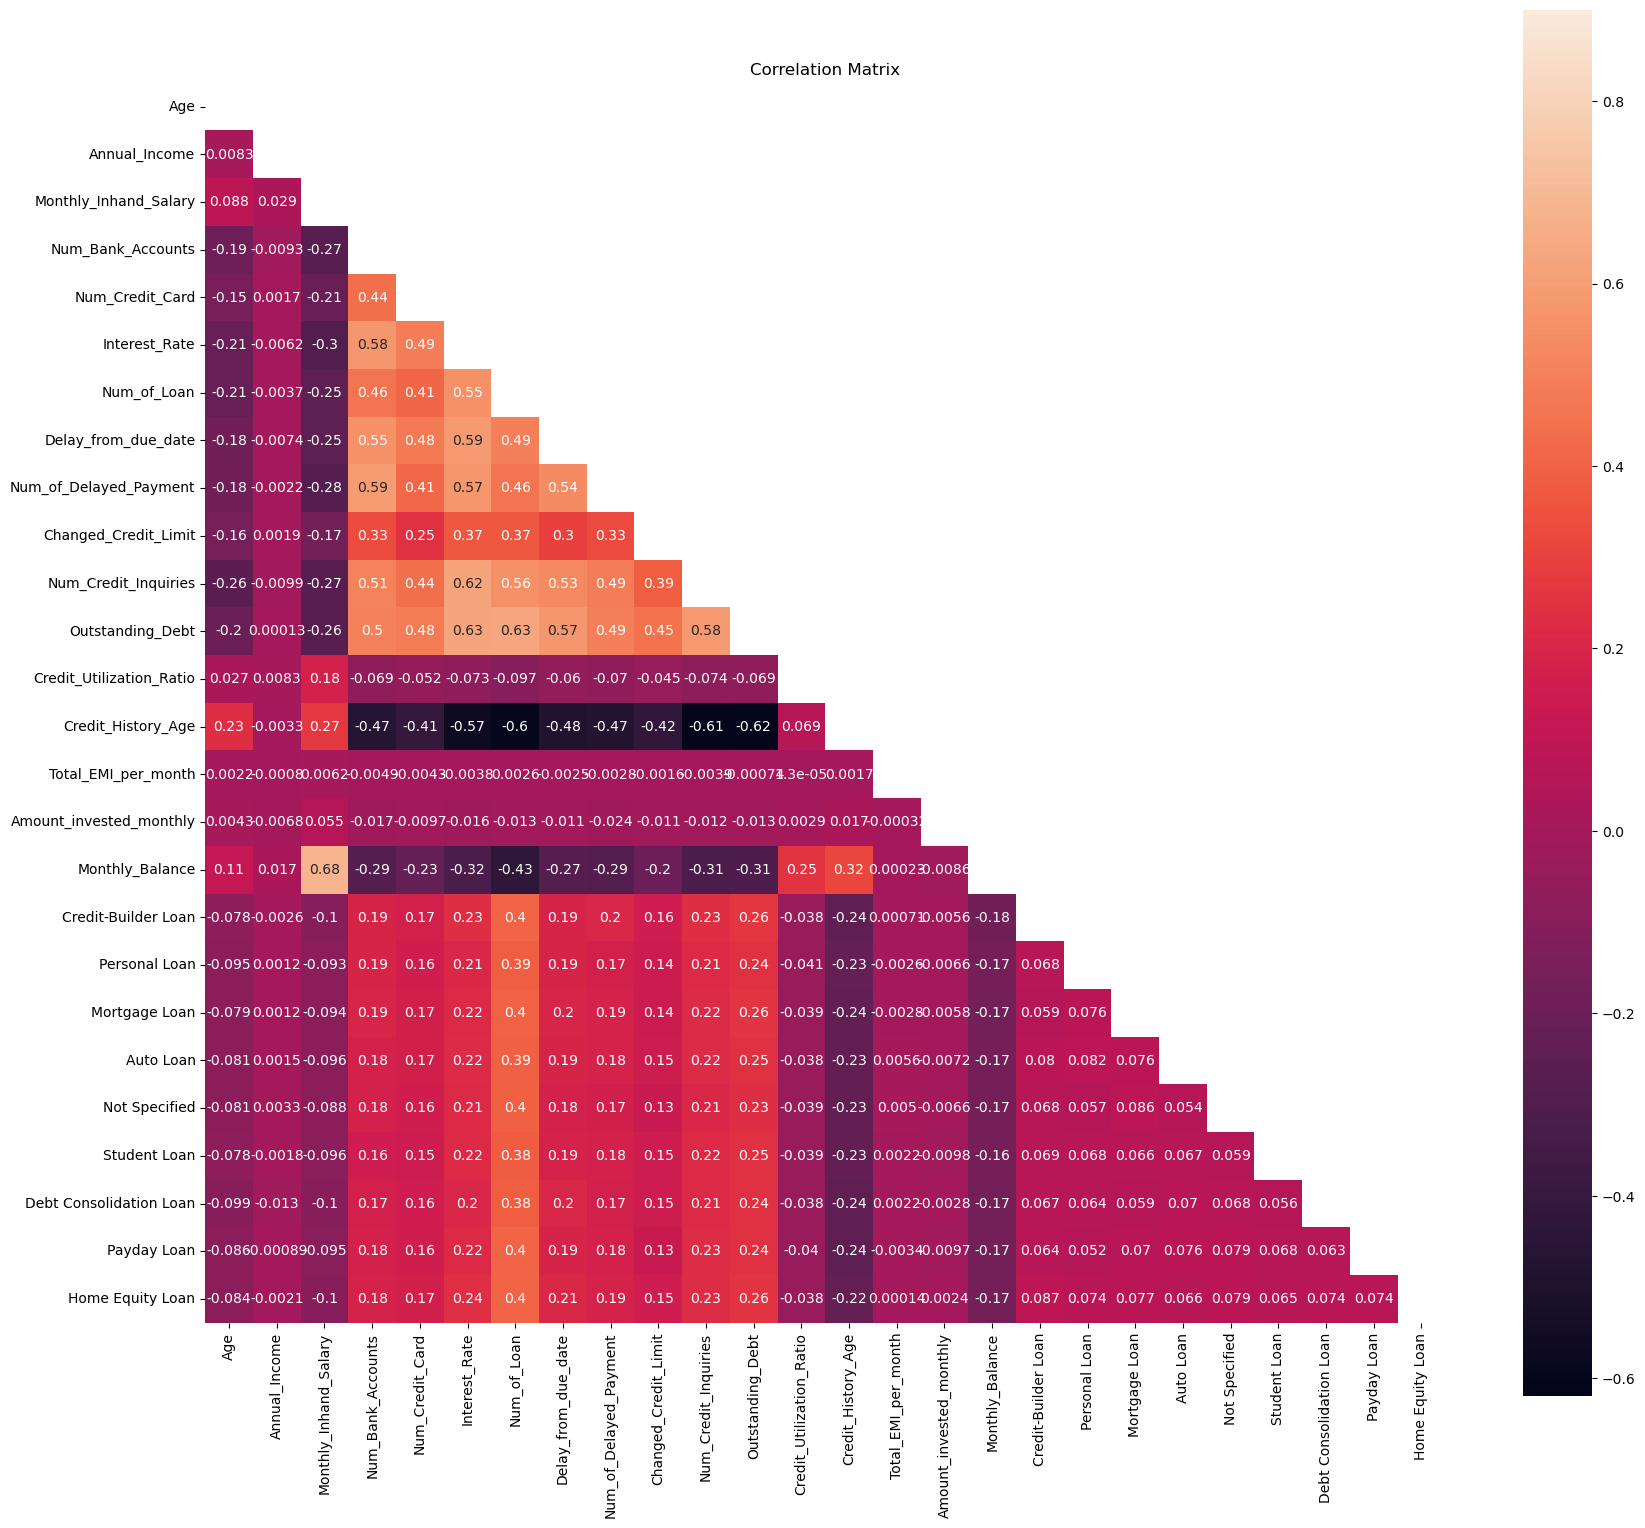

In [188]:
corr = data.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 18))
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True)
plt.title('Correlation Matrix')
plt.show()

Now that all the features have been thoroughly cleaned, we wanted to make sure that all the data types were good before continuing on. Next, we stored our labels in a variable, so that it is easily accessed later on as we will drop the column to preform steps for modeling. Customer_ID finally gets dropped as a feature because it is another feature that does not help tell us whether a customer has a good, bad, or standard credit score. Whenever, we one hot encode, having all columns can redundant because if we drop one of the columns for a one hot encoding of a feature, we know that the record belongs to the column if all other values for the feature is false. Once we check this, we are now ready to proceed to model and analyze machine learning results.

In [189]:
# Ensure all columns are proper types.
for col in downsampled_data.columns:
    print(f'{col} : {pd.api.types.infer_dtype(downsampled_data[col])}')
    
# Credit score column as labels column.
labels = downsampled_data['Credit_Score'].copy()
downsampled_data.drop(columns=['Credit_Score'], inplace = True)

# Drop Customer_ID because it is useless.
downsampled_data.drop(columns=['Customer_ID'], inplace = True)

# Drop one-hot encoding columns that represent the defaults (all the columns are 0) to reduce dimensionality.
downsampled_data.drop(columns=['Occupation_Unemployed'], inplace = True)
downsampled_data.drop(columns=['Not Specified'], inplace = True)
downsampled_data.drop(columns=['Credit Mix_Standard'], inplace = True)
downsampled_data.drop(columns=['Payment_of_Min_Amount_No'], inplace = True)
downsampled_data.drop(columns=['Payment_Behaviour_Low_spent_Small_value_payments'], inplace = True)

print(downsampled_data.shape[0])
downsampled_data.head()

Customer_ID : string
Age : floating
Annual_Income : floating
Monthly_Inhand_Salary : floating
Num_Bank_Accounts : floating
Num_Credit_Card : floating
Interest_Rate : floating
Num_of_Loan : floating
Delay_from_due_date : floating
Num_of_Delayed_Payment : floating
Changed_Credit_Limit : floating
Num_Credit_Inquiries : floating
Outstanding_Debt : floating
Credit_Utilization_Ratio : floating
Credit_History_Age : floating
Total_EMI_per_month : floating
Amount_invested_monthly : floating
Monthly_Balance : floating
Credit_Score : string
Occupation_Accountant : boolean
Occupation_Architect : boolean
Occupation_Developer : boolean
Occupation_Doctor : boolean
Occupation_Engineer : boolean
Occupation_Entrepreneur : boolean
Occupation_Journalist : boolean
Occupation_Lawyer : boolean
Occupation_Manager : boolean
Occupation_Mechanic : boolean
Occupation_Media_Manager : boolean
Occupation_Musician : boolean
Occupation_Scientist : boolean
Occupation_Teacher : boolean
Occupation_Unemployed : boolean
Oc

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit-Builder Loan,Personal Loan,Mortgage Loan,Auto Loan,Student Loan,Debt Consolidation Loan,Payday Loan,Home Equity Loan,Credit Mix_Bad,Credit Mix_Good,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments
63259,39.0,17692.555,1711.379583,5.0,4.0,9.0,1.0,20.0,20.0,18.74,6.0,813.67,32.129283,302.0,11.826839,53.243273,356.067846,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,1,0,0,0,False,False,True,False,True,False,False,False
61529,36.0,66095.880,4922.349023,7.0,4.0,10.0,4.0,18.0,17.0,16.49,8.0,1293.86,24.226905,101.0,822.996754,574.342998,56.500225,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,1,0,1,1,False,False,True,False,False,False,False,True
696,37.0,85328.730,6858.727500,3.0,4.0,11.0,1.0,7.0,17.0,1.83,2.0,585.05,29.335639,381.0,68.458966,318.307342,579.106442,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,1,0,0,0,False,True,False,False,False,False,False,True
7170,42.0,31645.660,2676.138333,4.0,4.0,4.0,2.0,25.0,14.0,8.60,4.0,807.06,31.223807,314.0,34.257541,49.257309,434.098983,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,0,1,0,0,0,0,False,True,False,False,True,False,False,False
41829,42.0,18202.235,1259.852917,2.0,2.0,3.0,0.0,5.0,6.0,1.78,4.0,1346.83,36.460218,272.0,0.000000,71.349193,334.636098,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,False,True,False,False,False,False,False,True


# Building the Model

With our dataset cleaned and engineered, we can now perform various machine learning algorithms to predict credit scores in bins of good, poor, or standard, using the features of credit and bank information. If the machine learning algorithm able to accurately predict, then we want to determine which classification algorithm is the best at predicting.

When running each model, we tuned the hyperparamters specific to the algorithm and utilized nested cross validation to find the best hyperparameter.

## Decision Tree Classifier

The parameters we are tuning here are max_depth, min_samples_leaf, and max_features. Using GridSearch CV, we will find the best parameters to use to maximize the accuracy of the model.

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier()
data_y = labels
data_x = downsampled_data # Features for the data
params = {"max_depth": [6, 7, 8],
"min_samples_leaf": [74, 75, 76], "max_features": [22, 23, 24]}
grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs = -1)
y_pred = cross_val_predict(grid_search, downsampled_data, labels, cv = 10)

accuracy = accuracy_score(labels, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:")
print(classification_report(labels, y_pred))

conf_matrix = confusion_matrix(labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy:  0.7227473219911783
Classification Report:
              precision    recall  f1-score   support

        Good       0.71      0.82      0.76     14283
        Poor       0.75      0.76      0.76     14283
    Standard       0.71      0.58      0.64     14283

    accuracy                           0.72     42849
   macro avg       0.72      0.72      0.72     42849
weighted avg       0.72      0.72      0.72     42849

Confusion Matrix:
[[11766   640  1877]
 [ 1826 10918  1539]
 [ 2939  3059  8285]]


## KNN

We ran the KNN algorithm after scaling and running PCA on our dataset within the pipeline to ensure that the algorithm wouldn't struggle with the curse of dimensionality. The hyperparameters that we tuned was the number of components for PCA and the value k, which represents the number of nearest neighbors.


In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
pca = PCA()
knn = KNeighborsClassifier(n_neighbors = 7)
pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('knn', knn)
])

param_grid = {
    'pca__n_components': list(range(20, 25)),
    'knn__n_neighbors': list(range(4, 7))
}

grid_search = GridSearchCV(pipeline, param_grid, cv = 5, n_jobs = -1)
y_pred = cross_val_predict(grid_search, downsampled_data, labels, cv = 10)

accuracy = accuracy_score(labels, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(labels, y_pred))

conf_matrix = confusion_matrix(labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.6547877430045042
Classification Report:
              precision    recall  f1-score   support

        Good       0.64      0.79      0.71     14283
        Poor       0.69      0.70      0.70     14283
    Standard       0.63      0.47      0.54     14283

    accuracy                           0.65     42849
   macro avg       0.65      0.65      0.65     42849
weighted avg       0.65      0.65      0.65     42849

Confusion Matrix:
[[11316   870  2097]
 [ 2340 10059  1884]
 [ 3988  3613  6682]]


## Neural Net

We trained a Neural Network and tuned the size of the hidden layers and the type of activation function as the hyperparamters.

In [190]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter = 20, solver = 'adam', random_state = 8))
])

# Define the parameter grid for grid search
param_grid = {
    'mlp__hidden_layer_sizes': [30, 40, 50, 60],
    'mlp__activation': ['logistic', 'tanh', 'relu']
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv = 5, n_jobs = -1)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    y_pred = cross_val_predict(grid_search, downsampled_data, labels, cv = 10)

accuracy = accuracy_score(labels, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(labels, y_pred))

conf_matrix = confusion_matrix(labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7208803005904455
Classification Report:
              precision    recall  f1-score   support

        Good       0.71      0.81      0.76     14283
        Poor       0.77      0.72      0.75     14283
    Standard       0.68      0.63      0.65     14283

    accuracy                           0.72     42849
   macro avg       0.72      0.72      0.72     42849
weighted avg       0.72      0.72      0.72     42849

Confusion Matrix:
[[11583   493  2207]
 [ 1928 10332  2023]
 [ 2764  2545  8974]]


## Random Forest

We wanted to test out ensembling, so we started with Random Forest. We tuned the max_depth, min_samples_leaf, and max_features hyperparamters.

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
params = {"max_depth": list(range(5, 10)),
          "min_samples_leaf": [70, 75, 80],
          "max_features": ["sqrt", "log2"]
         }
grid_search = GridSearchCV(pipeline, param_grid, cv = 5, n_jobs = -1)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    y_pred = cross_val_predict(grid_search, downsampled_data, labels, cv = 10)

accuracy = accuracy_score(labels, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(labels, y_pred))

conf_matrix = confusion_matrix(labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7208803005904455
Classification Report:
              precision    recall  f1-score   support

        Good       0.71      0.81      0.76     14283
        Poor       0.77      0.72      0.75     14283
    Standard       0.68      0.63      0.65     14283

    accuracy                           0.72     42849
   macro avg       0.72      0.72      0.72     42849
weighted avg       0.72      0.72      0.72     42849

Confusion Matrix:
[[11583   493  2207]
 [ 1928 10332  2023]
 [ 2764  2545  8974]]


## AdaBoost

This was another ensembling technique that we tried.

In [145]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators = 150)
y_pred = cross_val_predict(clf, downsampled_data, labels, cv = 10)

accuracy = accuracy_score(labels, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(labels, y_pred))

conf_matrix = confusion_matrix(labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7086046348806273
Classification Report:
              precision    recall  f1-score   support

        Good       0.69      0.83      0.75     14283
        Poor       0.75      0.70      0.73     14283
    Standard       0.69      0.60      0.64     14283

    accuracy                           0.71     42849
   macro avg       0.71      0.71      0.71     42849
weighted avg       0.71      0.71      0.71     42849

Confusion Matrix:
[[11809   513  1961]
 [ 2301 10045  1937]
 [ 2957  2817  8509]]


In [146]:
# PCA Analysis (used for Clustering and supervised learning below).
scaler = StandardScaler()
scaler.fit(downsampled_data)
std_data = scaler.transform(downsampled_data)
pca = PCA(n_components = 0.95, svd_solver = 'full')
pca_data = pca.fit_transform(std_data)
pca_df = pd.DataFrame(pca_data)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,-0.098967,-0.278554,2.233507,1.440429,0.043208,-0.264546,-0.126132,-2.047678,-1.789641,-0.294067,0.280570,0.242029,-1.037581,0.560197,-0.185587,0.533491,1.073575,1.742805,-1.715583,-0.352893,-0.869298,-0.081296,-0.104587,0.574189,-1.050886,0.265046,0.135011,1.953939,1.172676,0.083484,-0.126013,0.330829,-0.932238,-0.010086,0.318897,0.169373,-0.853178,0.177447
1,1.785913,-1.644709,-0.044231,-1.045709,2.053253,-0.488489,0.407608,-0.211887,0.756576,2.031321,1.125395,1.240012,-0.268575,-0.756411,0.132074,2.253729,-0.234898,-1.298755,-1.162347,0.405113,-0.645204,-0.482948,-0.951583,0.996902,-0.676340,-0.080709,1.976217,1.785759,-1.110656,0.000337,0.014629,0.877622,-0.592249,1.164672,0.588008,0.309439,0.115617,-0.601181
2,-2.952422,-0.656630,-0.292829,-1.230368,1.925315,-0.961413,-1.492307,-0.850687,0.888829,0.028656,-1.620168,-0.647816,0.732077,-2.314615,0.544353,0.019565,0.188357,0.492194,-0.119532,-0.536173,-0.584356,0.574492,-0.476748,-0.773530,-0.476794,0.129463,-0.380665,1.643709,0.019100,1.184738,-0.174709,-0.395487,0.585953,0.831556,1.020151,0.216853,-0.700671,-0.415979
3,-2.015740,-0.469302,0.231353,2.147596,0.028295,0.120674,1.440480,-0.314419,0.812497,-0.983336,-0.375760,1.779814,-0.811312,-0.646892,1.713971,-1.927991,-0.878526,-0.460010,0.248095,-0.345355,-0.582373,-0.233830,-0.185985,-0.383843,0.166668,-0.236343,-0.129557,-0.014076,1.910380,-0.297583,-0.687999,0.846605,-0.103424,0.039012,-0.447437,0.364896,-0.870108,0.281384
4,-3.366242,-1.731987,-0.281930,-1.145861,1.897193,-0.458550,0.392127,0.715707,-1.327287,-1.474111,-0.271541,1.360836,-0.311859,-1.144586,-2.245207,0.300156,0.117885,-0.806480,0.361592,-1.246749,0.325262,0.328743,0.087869,-0.788776,-0.926837,-0.473025,-0.207585,-0.322405,-0.244202,0.051273,-0.181151,-0.065379,-0.219998,-0.823659,-0.885095,1.226177,0.459085,-0.275173


## K-Means

We tried K-Means on both 3 and 4 for nearest neighbors and displayed the results in visualizations

In [147]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import silhouette_score
import numpy as np

label_mapping = {"Good": 0, "Standard": 1, "Poor": 2}
labels_numerical = np.array([label_mapping[label] for label in labels])

kmeans = KMeans(n_clusters = 3, random_state = 8)
y_pred = kmeans.fit_predict(pca_df)
silhouette_val = silhouette_score(pca_df, y_pred)

print("Silhouette Score: ", silhouette_val)

conf_matrix = confusion_matrix(labels_numerical, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(labels_numerical, y_pred)
print("Accuracy:", accuracy)

# Needed?
print("Classification Report:")
print(classification_report(labels_numerical, y_pred))

c:\Users\ayujv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score:  0.07722150877461448
Confusion Matrix:
[[  297  1867 12119]
 [ 2393  7764  4126]
 [ 8041  3482  2760]]
Accuracy: 0.25253798221662116
Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.02      0.02     14283
           1       0.59      0.54      0.57     14283
           2       0.15      0.19      0.17     14283

    accuracy                           0.25     42849
   macro avg       0.25      0.25      0.25     42849
weighted avg       0.25      0.25      0.25     42849



c:\Users\ayujv\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


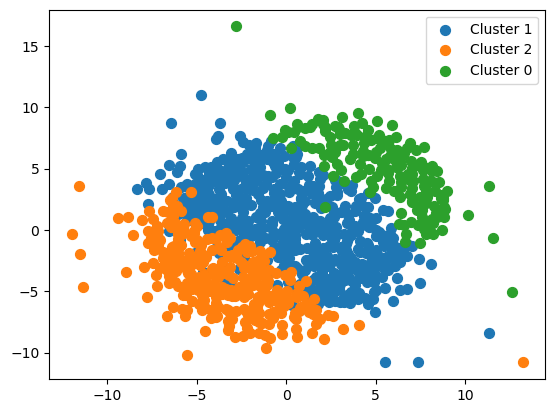

In [148]:
# Scatter function taken from Professor Beasley's Assignment 5: Clustering.
import random
from sklearn.manifold import MDS

def scatter(data, labels, numPoints=1000): # Modified number of points from 300 to 1000.
    numEntries = data.shape[0]
    start = random.randint(0, numEntries - numPoints)
    end = start + numPoints
    data = data.iloc[start:end, :]
    labels = labels.iloc[start:end]
    
    mds = MDS(n_components=2)
    mds_data = mds.fit_transform(data)
    
    unique_labels = labels.unique()
    
    for label in unique_labels:
        cluster_data = mds_data[labels == label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {label}', s=50)
    
    plt.legend()
    plt.show()
    
scatter(pca_df, pd.Series(y_pred))

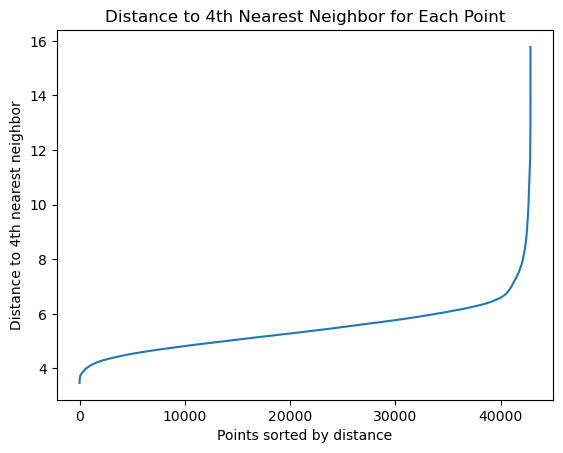

In [149]:
from sklearn.neighbors import NearestNeighbors

neighbors_model = NearestNeighbors(n_neighbors = 200)
neighbors_model.fit(pca_data)

distances, _ = neighbors_model.kneighbors(pca_data)
fourth_distances = distances[ : , 199]

fourth_distances_sorted = np.sort(fourth_distances)

plt.plot(fourth_distances_sorted)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 4th nearest neighbor')
plt.title('Distance to 4th Nearest Neighbor for Each Point')
plt.show()

# An Eps of 6.

## DBScan

c:\Users\ayujv\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


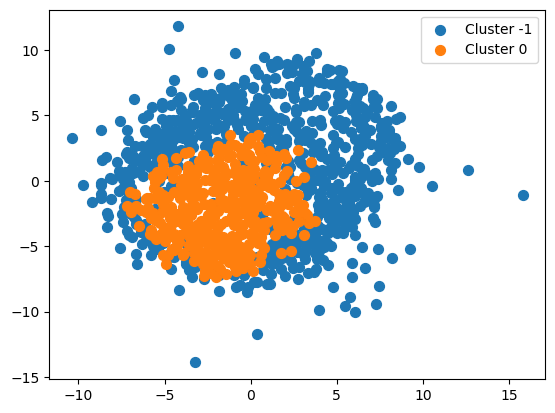

Silhouette Score:  0.03287267011390028
Accuracy: 0.17585007818152115
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.51      0.53      0.52     14283
           1       0.00      0.00      0.00     14283
           2       0.00      0.00      0.00     14283

    accuracy                           0.18     42849
   macro avg       0.13      0.13      0.13     42849
weighted avg       0.17      0.18      0.17     42849

Confusion Matrix:
[[  297  1867 12119]
 [ 2393  7764  4126]
 [ 8041  3482  2760]]


c:\Users\ayujv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ayujv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ayujv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ayujv\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [150]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 6, min_samples = 10000)
predicted_labels = dbscan.fit_predict(pca_data)
predicted_labels_series = pd.Series(predicted_labels)
scatter(pca_df, predicted_labels_series)

silhouette_val = silhouette_score(pca_df, predicted_labels_series)

print("Silhouette Score: ", silhouette_val)

accuracy = accuracy_score(labels_numerical, predicted_labels_series)
print("Accuracy:", accuracy)

# Needed?
print("Classification Report:")
print(classification_report(labels_numerical, predicted_labels_series))

conf_matrix = confusion_matrix(labels_numerical, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


# Analysis

We trained 7 various models on our dataset to make predictions about whether a person’s credit score is good, standard or poor: decision tree, k-nearest neighbor, neural network, random forest, Adaboost, K-Means, and DBScan. 

To assess the efficacy of each model, we utilize several evaluation metrics, including accuracy, precision, recall, and F1-score. Accuracy measures the overall correctness of the predictions, which means that out all predictions made, how many were true. Precision quantifies the proportion of true positive predictions among all positive predictions. In other words, out of all the positive predictions, how many were true positive. Recall calculates the proportion of true positives that were correctly identified out of all data points that should be predicted as true. Lastly, F1-score provides a balanced measure of a model's performance, considering both precision and recall. It’s important to look at all these metrics instead of just accuracy as accuracy can be invalid and skewed at times. We want to attempt to maximize all these values.

We initially trained models on the whole dataset, which was not a good idea for two reasons. The biggest reason is the idea of a class imbalance within the data. When exploring our dataset, we outputted the number of records with Standard, Good, and Poor. We quickly found that the Poor records weren't represented as much in the dataset. Therefore, we adjusted this class imbalance by downsampling our data and making each class have around 14000 records, which is the amount of data records with the label Poor. After downsampling, each class had the same number of records. The next reason why we wanted to downsample our data to train on was due to the running time fo the computationally expensive algorithms. Whenever we tried to train our models with our entire dataset with about 100000 records, the many of the algorithms, like the neural network, was not able to finish in a reasonable amount of time (did not finish after 3 hours of training).

We can now compare the results of the various machine learning models:

### 1. Decision Tree
- The overall accuracy of the decision tree model is around **73%**.
- The results of the model shows decent accuracy with relatively balanced precision, recall, and F1-score for all three classes. Notably, the recall for the "Standard" class is slightly lower compared to the other classes.

### 2. K-Nearest Neighbors
- The overal accuracy of the trained KNN model is around **66%**.
- This demonstrates a moderately well performance by the KNN model. However, the precision and recall was lower for the "Standard" class compared to the other classes.

### 3. Neural Network
- The overall accuracy of the trained Neural Network is around **72%**.
- This model gave us a decently high precision, recall, and F1 score for all three class. However, similar to the previous two models, the precision and recall for the "Standard" class was relatively lower compared to "Good" and "Poor"

### 4. Random Forest
- The overall accuracy of the trained Random Forest model is around **72%**.
- The results for this model was interesting because it predicted the exact same way as what the Neural Network did. The confusion matrix is identical for both of the models, giving us the same precision, recall, and F score throughout all classes. Therefore, similar to the Neural Network, the precision and recall for the "Standard" class was relatively lower compared to the other two classes.

### 5. AdaBoost
- The overall accuracy of the trained AdaBoost model was around **71%**.
- Like the previous models, this model also performed pretty well, with a decently high accuracy. This model also slightly struggled in correctly classifying the "Standard" class in comparison to the other two classes.

### 6. K-Means
- The overall accuracy of the trained K-Means model was around **25%**.
- This had a really poor performance and demonstrates how it was worse than simply just guessing between Standard, Poor, and Good. The F Score for predicting the Standard class was a lot higher than the F score for the other two classes, which were extremely low.

### 7. DBScan
- The overall accuracy of the trained DBScan model was around **18%**.
- This was the worst model that was trained, which simply demonstrates that this dataset is not fit to utilize DBScan as a machine learning model.

Overall, after analyzing all the models that we trained, it is clear that the supervised learning models (Decision Tree, KNN, Neural Network, Random Forest, and AdaBoost) significantly outperform the unsupervised learning models (K-Means and DBScan). This suggestst that the task of classifying credit scores into Good, Poor, or Standard based on credit and banking information benefits greatly from labeled data. Decision Tree, Neural Network, Random Forest, and AdaBoost have similar performances, with accuracies ranging around 70-73%. KNN slightly lags behind, while unsupervised learning methods (K-Means and DBScan) perform poorly. Since the unsupervised learning models had similar performances, it's crucial to also think about how efficient each algorithm is for the data that we have (large number of records and high dimensionality), which can also help us decide which model to use for this dataset. Extra experimentation with ensemble methods or alternative, more complex machine learning algorithms could enhance the model accuracy. Furthermore, continued feature engineering can also yield improved performance.


## Using PCA data.

In [151]:
clf = DecisionTreeClassifier()
data_y = labels
data_x = pca_df # Features for the data
params = {"max_depth": [6, 7, 8],
"min_samples_leaf": [74, 75, 76], "max_features": [22, 23, 24]}
grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs = -1)
y_pred = cross_val_predict(grid_search, pca_df, labels, cv = 10)

accuracy = accuracy_score(labels, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:")
print(classification_report(labels, y_pred))

conf_matrix = confusion_matrix(labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy:  0.6865271068169619
Classification Report:
              precision    recall  f1-score   support

        Good       0.66      0.81      0.73     14283
        Poor       0.74      0.69      0.71     14283
    Standard       0.66      0.56      0.60     14283

    accuracy                           0.69     42849
   macro avg       0.69      0.69      0.68     42849
weighted avg       0.69      0.69      0.68     42849

Confusion Matrix:
[[11588   493  2202]
 [ 2509  9900  1874]
 [ 3337  3017  7929]]


In [152]:
# Define the pipeline
pipeline = Pipeline([
    ('mlp', MLPClassifier(max_iter = 20, solver = 'adam', random_state = 8))
])

# Define the parameter grid for grid search
param_grid = {
    'mlp__hidden_layer_sizes': [30, 40, 50, 60],
    'mlp__activation': ['logistic', 'tanh', 'relu']
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv = 5, n_jobs = -1)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    y_pred = cross_val_predict(grid_search, pca_df, labels, cv = 10)

accuracy = accuracy_score(labels, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(labels, y_pred))

conf_matrix = confusion_matrix(labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7118019090293822
Classification Report:
              precision    recall  f1-score   support

        Good       0.70      0.81      0.75     14283
        Poor       0.76      0.71      0.74     14283
    Standard       0.68      0.61      0.64     14283

    accuracy                           0.71     42849
   macro avg       0.71      0.71      0.71     42849
weighted avg       0.71      0.71      0.71     42849

Confusion Matrix:
[[11574   548  2161]
 [ 2110 10205  1968]
 [ 2830  2732  8721]]


In [153]:
clf = RandomForestClassifier()
params = {"max_depth": list(range(5, 10)),
          "min_samples_leaf": [70, 75, 80],
          "max_features": ["sqrt", "log2"]
         }
grid_search = GridSearchCV(pipeline, param_grid, cv = 5, n_jobs = -1)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    y_pred = cross_val_predict(grid_search, pca_df, labels, cv = 10)

accuracy = accuracy_score(labels, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(labels, y_pred))

conf_matrix = confusion_matrix(labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7118019090293822
Classification Report:
              precision    recall  f1-score   support

        Good       0.70      0.81      0.75     14283
        Poor       0.76      0.71      0.74     14283
    Standard       0.68      0.61      0.64     14283

    accuracy                           0.71     42849
   macro avg       0.71      0.71      0.71     42849
weighted avg       0.71      0.71      0.71     42849

Confusion Matrix:
[[11574   548  2161]
 [ 2110 10205  1968]
 [ 2830  2732  8721]]


In [154]:
clf = AdaBoostClassifier(n_estimators = 150)
y_pred = cross_val_predict(clf, pca_df, labels, cv = 10)

accuracy = accuracy_score(labels, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(labels, y_pred))

conf_matrix = confusion_matrix(labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6787322924689024
Classification Report:
              precision    recall  f1-score   support

        Good       0.67      0.80      0.73     14283
        Poor       0.73      0.69      0.71     14283
    Standard       0.64      0.55      0.59     14283

    accuracy                           0.68     42849
   macro avg       0.68      0.68      0.68     42849
weighted avg       0.68      0.68      0.68     42849

Confusion Matrix:
[[11378   551  2354]
 [ 2422  9787  2074]
 [ 3302  3063  7918]]


In [155]:
# Drop Credit History Age
downsampled_data.drop(columns=['Credit_History_Age'], inplace = True)

clf = DecisionTreeClassifier()
data_y = labels
data_x = downsampled_data # Features for the data
params = {"max_depth": [6, 7, 8],
"min_samples_leaf": [74, 75, 76], "max_features": [22, 23, 24]}
grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs = -1)
y_pred = cross_val_predict(grid_search, downsampled_data, labels, cv = 10)

accuracy = accuracy_score(labels, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:")
print(classification_report(labels, y_pred))

conf_matrix = confusion_matrix(labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy:  0.7264580270251347
Classification Report:
              precision    recall  f1-score   support

        Good       0.72      0.82      0.77     14283
        Poor       0.75      0.77      0.76     14283
    Standard       0.71      0.59      0.64     14283

    accuracy                           0.73     42849
   macro avg       0.73      0.73      0.72     42849
weighted avg       0.73      0.73      0.72     42849

Confusion Matrix:
[[11755   648  1880]
 [ 1787 11005  1491]
 [ 2869  3046  8368]]
